In [1]:
import pandas as pd

In [20]:
from matplotlib import pyplot as plt

In [21]:
%matplotlib inline

In [3]:
# read data
train_df = pd.read_csv('../data/train.csv', index_col='id')
train_df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [13]:
train_df.shape

(595212, 58)

In [12]:
# drop calc features
calc_features_list = [col_name for col_name in train_df.columns if col_name.find('calc')>-1]

In [15]:
df = train_df.drop(calc_features_list, axis=1)

In [16]:
df.shape

(595212, 38)

In [62]:
df.to_pickle('dc_cat_calc.pcl')

In [35]:
cat_features_list = [col_name for col_name in df.columns if col_name.find('cat')>-1]
cat_features_list

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [56]:
bin_features_list = [col_name for col_name in df.columns if col_name.find('bin')>-1]
bin_features_list.append('ps_car_08_cat')
bin_features_list.append('ps_car_10_cat')

len(bin_features_list)

13

Всего осталось 37 фич. Из них 11 - бинарных.

In [57]:
non_bin_features_list = [x for x in df.columns.tolist() if x not in bin_features_list]

In [59]:
len(non_bin_features_list)

25

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7599E46D8>],
      dtype=object)

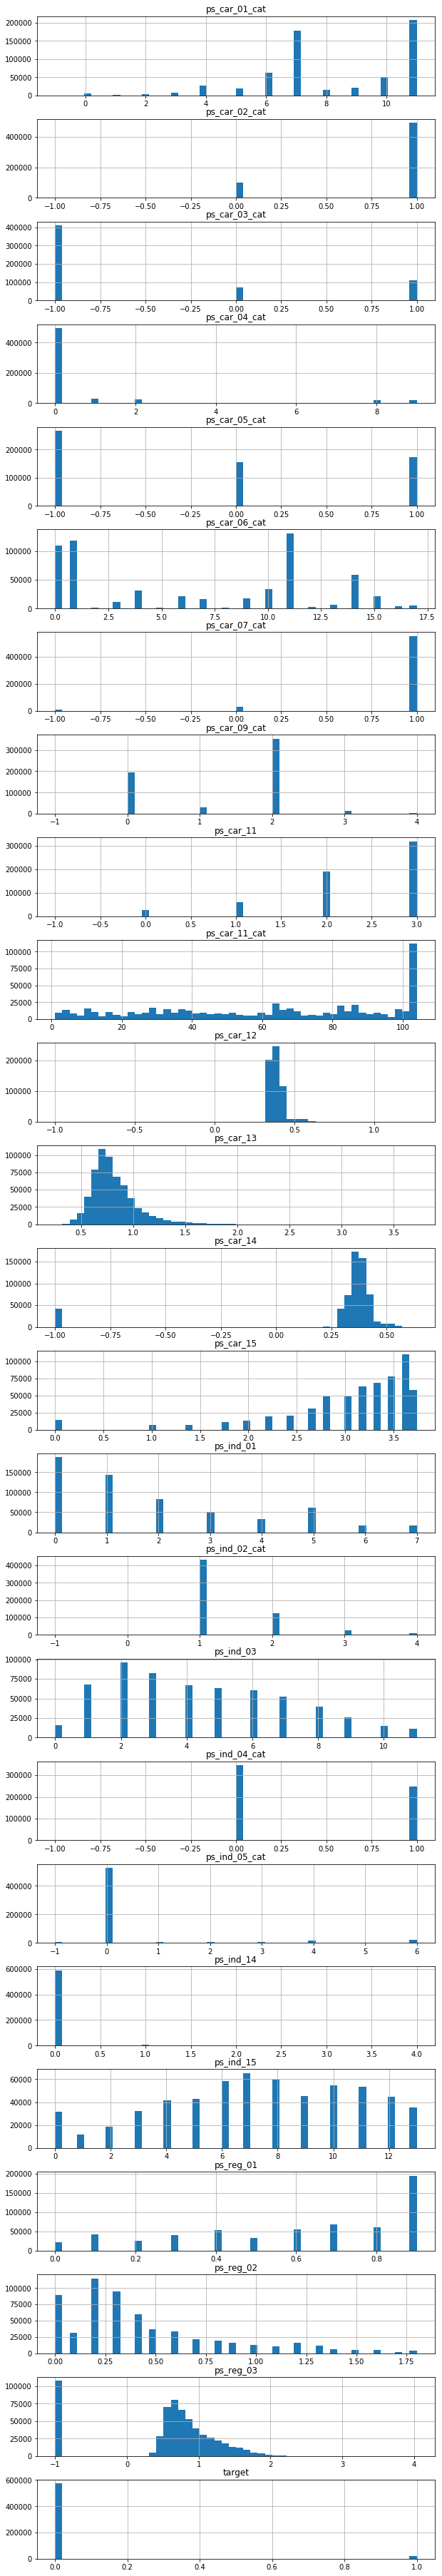

In [58]:
df[non_bin_features_list].hist(layout = [38, 1], figsize =[10, 100], bins = 50)

In [60]:
df['ps_car_02_cat'].unique()

array([ 1,  0, -1], dtype=int64)

In [61]:
df.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'],
      dtype='object')

In [9]:
'calc_'.find('calc0')

-1

In [6]:
X_train = train_df.drop('target', axis=1)

In [10]:
X_train.shape

(595212, 57)

In [9]:
from deep_classifier import DeepClassifier

In [12]:
dae = DeepClassifier(features=57, restart=True)

In [16]:
dae.train_dae(X_train)

INFO:tensorflow:Restoring parameters from ./DAE_model
  0:  15525.839,  0.1000


KeyboardInterrupt: 